# **Project Overview- Random Forest Analysis**

In this project, a Random Forest model was used to predict house prices from a dataset containing features like area, number of bedrooms, and other amenities. The process involved data preprocessing, splitting the data into training and testing sets, model training, and performance evaluation.

**Data** **Load**

In [2]:
import pandas as pd

# Load the dataset
file_path = '//content/Housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


 **Data Cleaning and Pre-processing**

In [3]:
# Checking for missing values
missing_values = data.isnull().sum()

# Converting categorical variables to numeric using one-hot encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the missing values and the first few rows of the encoded dataframe
missing_values, data_encoded.head()


(price               0
 area                0
 bedrooms            0
 bathrooms           0
 stories             0
 mainroad            0
 guestroom           0
 basement            0
 hotwaterheating     0
 airconditioning     0
 parking             0
 prefarea            0
 furnishingstatus    0
 dtype: int64,
       price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
 0  13300000  7420         4          2        3        2             1   
 1  12250000  8960         4          4        4        3             1   
 2  12250000  9960         3          2        2        2             1   
 3  12215000  7500         4          2        2        3             1   
 4  11410000  7420         4          1        2        2             1   
 
    guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
 0              0             0                    0                    1   
 1              0             0                    0                    1   
 2 

**Split the data into training and testing sets**

The data has been successfully split into training and testing sets:

Training set: 436 entries (80% of the data)

Testing set: 109 entries (20% of the data)

Each set includes 12 features (after one-hot encoding).

In [4]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and target (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((436, 13), (109, 13), (436,), (109,))

** Build the Random Forest model**


1.  Creating a Random Forest model.
2.  Training (fitting) it on the training data.


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Model is now trained. Next step will be to make predictions and evaluate the model.
"Random Forest model trained successfully."


'Random Forest model trained successfully.'

**Making predictions and calculating relevant metrics**


1.   Use the model to make predictions on the test data.
2.   Calculate evaluation metrics to assess the model's performance. Common metrics for regression models include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).



In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(1021546.0353211008, 1961585044320.3433, 0.611918531405699)

**Mean Absolute Error (MAE):** Approximately 1,021,546.

**Mean Squared Error (MSE):** Approximately 1,961,585,044,320.

**R-squared (R²):** 0.612. This indicates that about 61.2% of the variance in the house prices can be explained by the model.

These metrics give us an idea of the model's performance. A higher R² value and lower values of MAE and MSE generally indicate a better model. However, the interpretation also depends on the context and the specific use case.

 **Model Performance Plots**

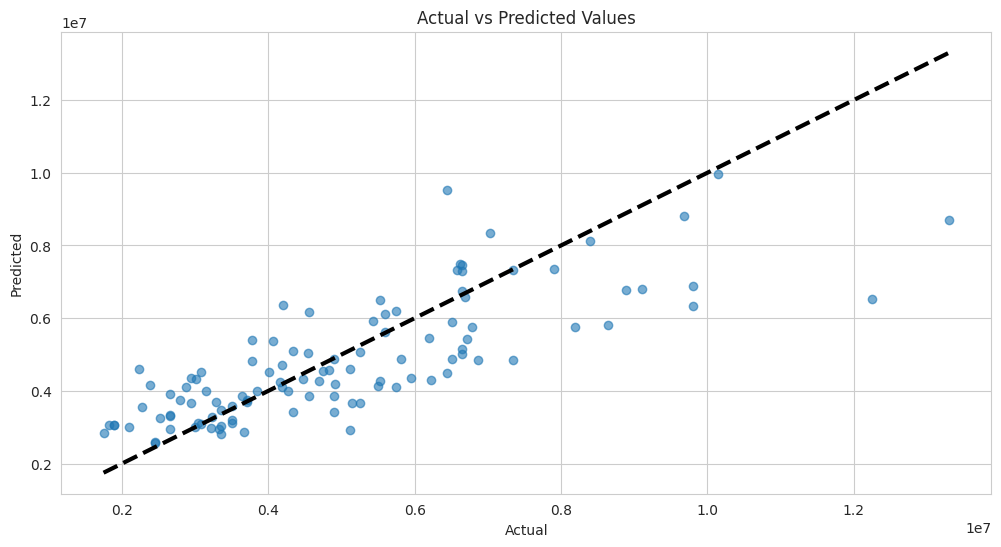

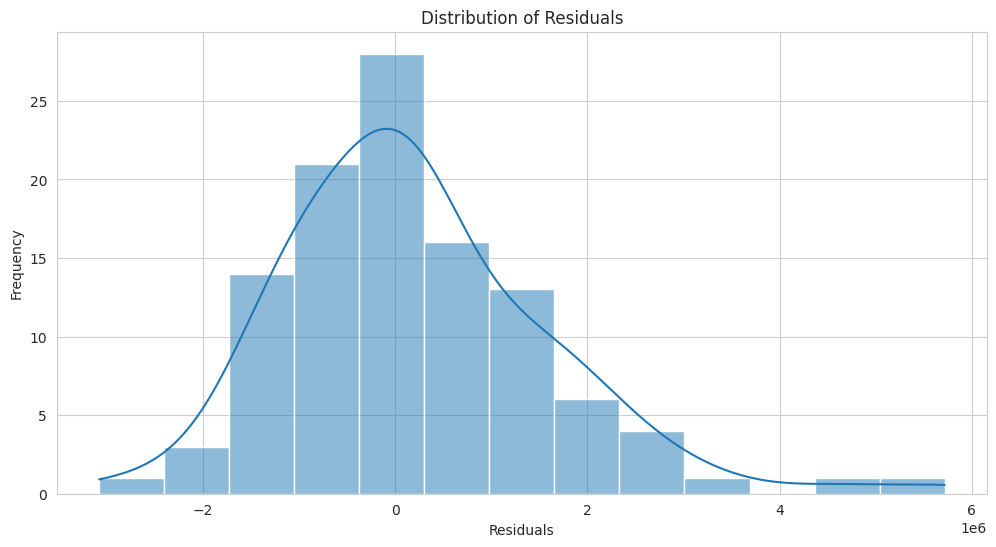

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.show()


**Feature importance plot**

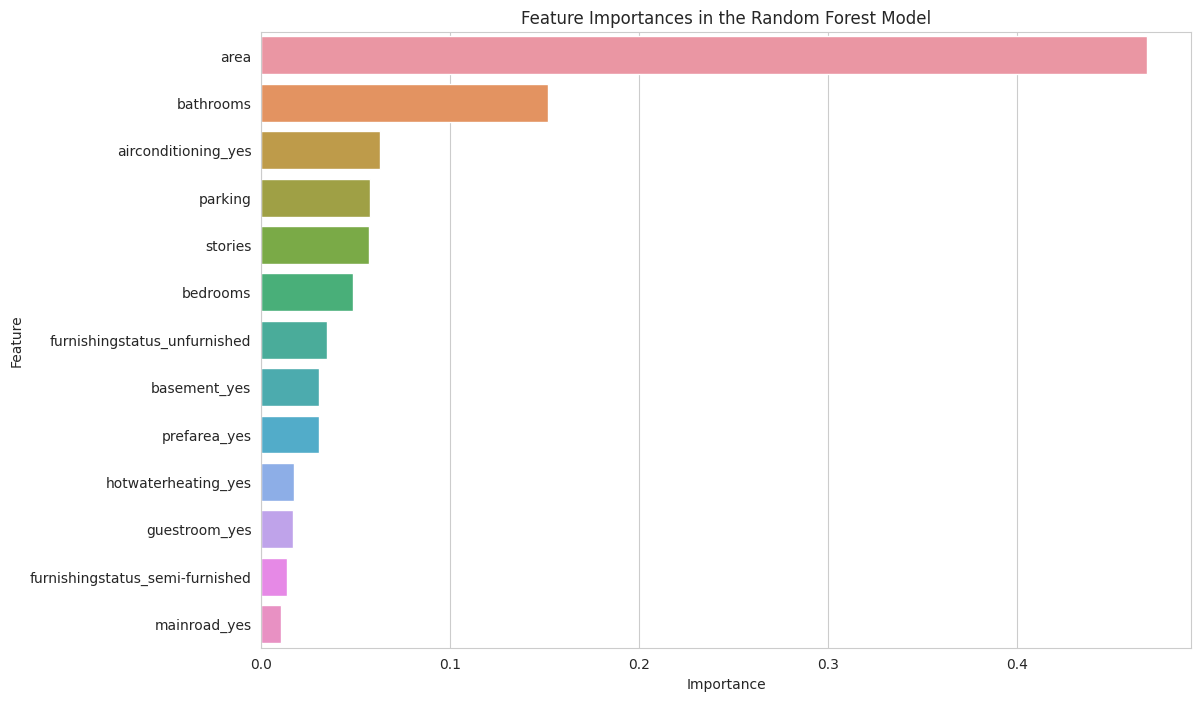

In [10]:
# Feature Importance Plot
feature_importance = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




*   This plot indicates the relative importance of each feature in predicting the house prices.

*   Features with higher importance values have a greater influence on the model's predictions.



**Calculating and Plotting the Learning Curve.**

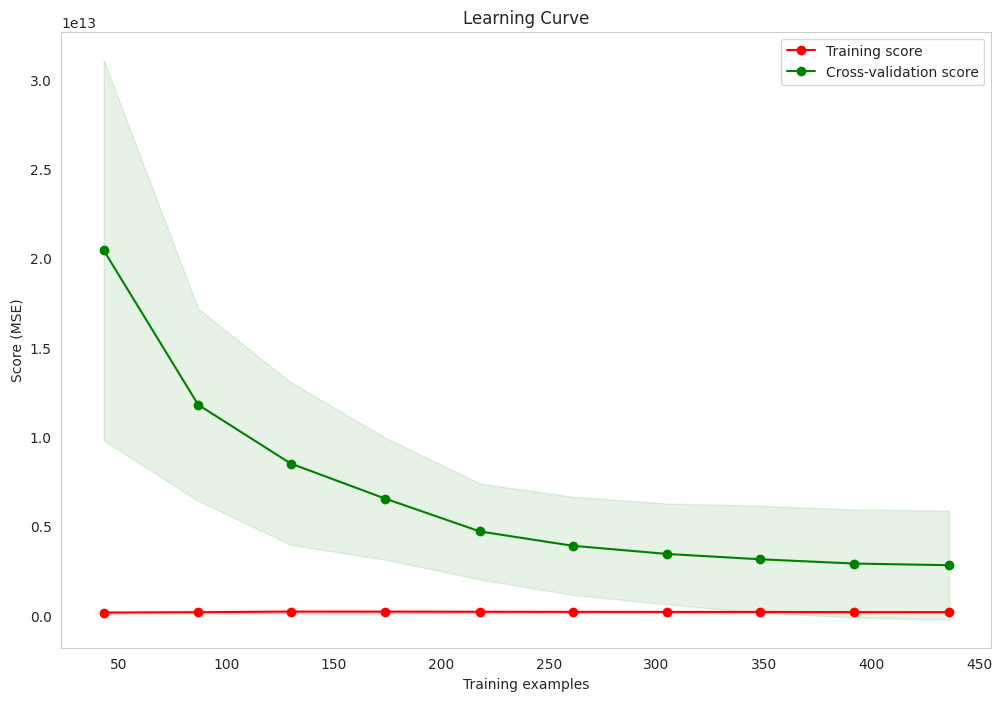

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np

# Defining training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calculating mean and standard deviation of training and testing scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plotting the learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score (MSE)")
plt.legend(loc="best")
plt.grid()
plt.show()


# **Conclusion**
The model demonstrated a moderate predictive ability with an R² of 0.612, suggesting it could explain about 61.2% of the variance in house prices. The feature importance and learning curve analyses provided insights into influential variables and the model's performance across different training sizes. The results highlight the model's potential and areas for further refinement.